<-img src="img1.jpg" align=”center”>
<h1>Previsão de transações bancárias de 200.000 clientes Santander</h1> <br>
Projeto criado por <b>Alessandra Faria Abreu</b> enquanto ouvia Banda Eva e tomava café <br>
Desafio disponivel no <i>Kaggle<i>

In [ ]:
#permite que os gráficos gerados sejam mostrados na mesma janela
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model 
from sklearn.model_selection import train_test_split 
#import plotly.graph_objs as go
#define o estilo dos gráficos , "ggplot" é um estilo popular em R
plt.style.use('ggplot') 

In [ ]:
#@title Default title text
#Realiza a leitura da base (csv) e carrega na mémoria
#Para execução dentro do colab-Google
from google.colab import drive
drive.mount('/content/drive/')
A ='/content/drive/My Drive/Trabalhos Faculdade/TDC/test.csv'
B = '/content/drive/My Drive/Trabalhos Faculdade/TDC/train.csv'
transacoesTrain = pd.read_csv(B)
transacoesTest = pd.read_csv(A)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<h1>Exploração das Bases</h1><br>
<h2>Visualização da relação de dados da base Train - Dados</h2>

In [ ]:
#Quantidade de linhas e colunas
transacoesTrain.shape

(200000, 202)

<h2>Visualização das Bases - Gráficos</h2>

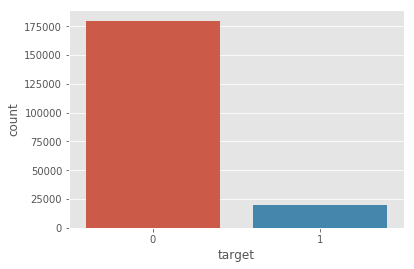

In [ ]:
sns.countplot(transacoesTrain['target'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


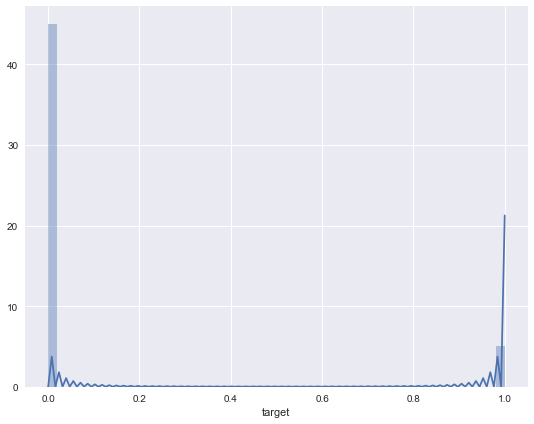

In [ ]:
#Mostra que o target é desbalanceado
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(transacoesTrain['target']);

# **Reamostragem**

In [ ]:
df = transacoesTrain.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(df.drop('target',
                                                    axis=1),
                                                    df['target'],
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
# Iremos dividir a base em target 1 e target 0
count_class_0, count_class_1 = transacoesTrain.target.value_counts()

# Divide
df_class_0 = transacoesTrain[transacoesTrain['target'] == 0]
df_class_1 = transacoesTrain[transacoesTrain['target'] == 1]

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
df_class_0.shape , df_class_1.shape

((179902, 202), (20098, 202))

Random over-sampling:
1    179902
0    179902
Name: target, dtype: int64


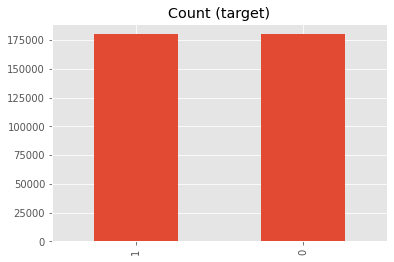

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_base_train_balanceada_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_base_train_balanceada_over.target.value_counts())

df_base_train_balanceada_over.target.value_counts().plot(kind='bar', title='Count (target)');

# EXECUTANDO O MODELO

In [ ]:
!apt-get install swig -y
!pip install Cython numpy

# sometimes you have to run the next command twice on colab
# I haven't figured out why
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (766 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking 

In [ ]:
#!pip install dask distributed
!pip install dask[complete] distributed --upgrade


In [ ]:
from scipy import stats
import sklearn.datasets
from sklearn.metrics import accuracy_score
from sklearn import svm
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import autosklearn.classification

In [ ]:
df = df_base_train_balanceada_over.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(df.drop('target',
                                                    axis=1),
                                                    df['target'],
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
# configure auto-sklearn
automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=18000, # execute o auto-sklearn por no máximo x segundos
          per_run_time_limit=10800, #, gastar no máximo Y segundos para cada modelo de treinamento
          include_preprocessors=["no_preprocessing"],
          delete_output_folder_after_terminate=False,
          delete_tmp_folder_after_terminate=False
          )

In [ ]:
# train model(s)
automl.fit(x_train, y_train)

# evaluate
y_hat = automl.predict(x_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_hat)
test_report = sklearn.metrics.classification_report(y_test, y_hat)
test_matrix = sklearn.metrics.confusion_matrix(y_test, y_hat)
print("-------------------------------------------------------------------------")
print("Test Accuracy score {0}".format(test_acc))
print("-------------------------------------------------------------------------")
print("Test Report score {0}".format(test_report))
print("-------------------------------------------------------------------------")
print("Test Confusion Matrix {0}".format(test_matrix))
print("-------------------------------------------------------------------------")
print(automl.sprint_statistics())
print("-------------------------------------------------------------------------")
print(automl.show_models())
print("-------------------------------------------------------------------------")
print(automl.get_models_with_weights())

[WARNING] [2021-07-16 19:46:41,818:Client-AutoML(1):8ad4eb2e-e66e-11eb-828e-0242ac1c0002] Dataset too large for memory limit 3072MB, reducing number of samples from 251862 to 200324.
[WARNING] [2021-07-16 19:46:46,800:Client-AutoML(1):8ad4eb2e-e66e-11eb-828e-0242ac1c0002] Capping the per_run_time_limit to 8997.0 to have time for a least 2 models in each process.
[WARNING] [2021-07-16 19:46:50,100:Client-AutoMLSMBO(1)::8ad4eb2e-e66e-11eb-828e-0242ac1c0002] Configuration 43 not found
[WARNING] [2021-07-16 19:46:50,100:Client-AutoMLSMBO(1)::8ad4eb2e-e66e-11eb-828e-0242ac1c0002] Configuration 338 not found
[WARNING] [2021-07-16 19:46:50,100:Client-AutoMLSMBO(1)::8ad4eb2e-e66e-11eb-828e-0242ac1c0002] Configuration 283 not found
[WARNING] [2021-07-16 19:46:50,100:Client-AutoMLSMBO(1)::8ad4eb2e-e66e-11eb-828e-0242ac1c0002] Configuration 624 not found
[WARNING] [2021-07-16 19:46:50,101:Client-AutoMLSMBO(1)::8ad4eb2e-e66e-11eb-828e-0242ac1c0002] Configuration 576 not found
[WARNING] [2021-07-16

<h2>Métricas</h2>

In [ ]:
X_train.shape, y_train.shape ,X_test.shape, y_test.shape

((140000, 200), (140000,), (60000, 200), (60000,))

In [ ]:
#Importar o módulo de métricas scikit-learn para o cálculo de precisão
from sklearn import metrics
# Acuracy , o quanto a arvore bateu
metrics.accuracy_score(y_test, y_pred)

0.8996333333333333

In [ ]:
# Para saber quão bem o modelo irá generalizar
#ou seja, ela serve para saber se o modelo será efetivo ao receber um dado que ele nunca viu na vida.
clf.score(X_train, y_train)

1.0

<h3>Matriz de Confusão</h3>

In [ ]:
#O Método confusion_matrix retorna a matriz de confusão
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,clf.predict(X_test))


array([[53976,     0],
       [ 6022,     2]])

In [ ]:
pd.crosstab(y_test,clf.predict(X_test),rownames=['Real'],colnames=['Predito'],margins=True)

Predito,0,1,All
Real,,,
0,53976,0,53976
1,6022,2,6024
All,59998,2,60000




```
-------------------------------------------------------------------------
Test Accuracy score 0.9102666246688036
-------------------------------------------------------------------------
Test Report score               precision    recall  f1-score   support

           0       0.92      0.90      0.91     53982
           1       0.90      0.92      0.91     53960

    accuracy                           0.91    107942
   macro avg       0.91      0.91      0.91    107942
weighted avg       0.91      0.91      0.91    107942

-------------------------------------------------------------------------
Test Confusion Matrix [[48649  5333]
 [ 4353 49607]]
-------------------------------------------------------------------------
auto-sklearn results:
  Dataset name: 29b090ba-e012-11eb-81fa-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.825949
  Number of target algorithm runs: 54
  Number of successful target algorithm runs: 12
  Number of crashed target algorithm runs: 6
  Number of target algorithms that exceeded the time limit: 5
  Number of target algorithms that exceeded the memory limit: 31

-------------------------------------------------------------------------
[(0.220000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'gini', 'classifier:decision_tree:max_depth_factor': 1.6785057002915527, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 4, 'classifier:decision_tree:min_samples_split': 20, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.180000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'passive_aggressive', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:passive_aggressive:C': 0.003328837875996956, 'classifier:passive_aggressive:average': 'True', 'classifier:passive_aggressive:fit_intercept': 'True', 'classifier:passive_aggressive:loss': 'hinge', 'classifier:passive_aggressive:tol': 0.0035999028286161847, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.012417001951578244},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.140000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'passive_aggressive', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:passive_aggressive:C': 0.14268277711454813, 'classifier:passive_aggressive:average': 'False', 'classifier:passive_aggressive:fit_intercept': 'True', 'classifier:passive_aggressive:loss': 'hinge', 'classifier:passive_aggressive:tol': 0.0002600768160857831, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0070580904199417415},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.120000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'gini', 'classifier:decision_tree:max_depth_factor': 1.5579368183433042, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 6, 'classifier:decision_tree:min_samples_split': 19, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.100000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'gini', 'classifier:decision_tree:max_depth_factor': 1.0671559685162069, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 7, 'classifier:decision_tree:min_samples_split': 17, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.100000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'entropy', 'classifier:decision_tree:max_depth_factor': 0.9121274471912393, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 8, 'classifier:decision_tree:min_samples_split': 16, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.080000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'gini', 'classifier:decision_tree:max_depth_factor': 0.32610381688381374, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 16, 'classifier:decision_tree:min_samples_split': 20, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.290252834387513},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.040000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'gini', 'classifier:decision_tree:max_depth_factor': 0.9474357745043398, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 20, 'classifier:decision_tree:min_samples_split': 15, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'gini', 'classifier:decision_tree:max_depth_factor': 0.45967706370571815, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 20, 'classifier:decision_tree:min_samples_split': 19, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0016619861530032675},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
]
-------------------------------------------------------------------------
[(0.22, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'gini', 'classifier:decision_tree:max_depth_factor': 1.6785057002915527, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 4, 'classifier:decision_tree:min_samples_split': 20, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})), (0.18, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'passive_aggressive', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:passive_aggressive:C': 0.003328837875996956, 'classifier:passive_aggressive:average': 'True', 'classifier:passive_aggressive:fit_intercept': 'True', 'classifier:passive_aggressive:loss': 'hinge', 'classifier:passive_aggressive:tol': 0.0035999028286161847, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.012417001951578244},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})), (0.14, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'passive_aggressive', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:passive_aggressive:C': 0.14268277711454813, 'classifier:passive_aggressive:average': 'False', 'classifier:passive_aggressive:fit_intercept': 'True', 'classifier:passive_aggressive:loss': 'hinge', 'classifier:passive_aggressive:tol': 0.0002600768160857831, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0070580904199417415},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})), (0.12, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'gini', 'classifier:decision_tree:max_depth_factor': 1.5579368183433042, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 6, 'classifier:decision_tree:min_samples_split': 19, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})), (0.1, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'gini', 'classifier:decision_tree:max_depth_factor': 1.0671559685162069, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 7, 'classifier:decision_tree:min_samples_split': 17, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})), (0.1, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'entropy', 'classifier:decision_tree:max_depth_factor': 0.9121274471912393, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 8, 'classifier:decision_tree:min_samples_split': 16, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})), (0.08, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'gini', 'classifier:decision_tree:max_depth_factor': 0.32610381688381374, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 16, 'classifier:decision_tree:min_samples_split': 20, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.290252834387513},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})), (0.04, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'gini', 'classifier:decision_tree:max_depth_factor': 0.9474357745043398, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 20, 'classifier:decision_tree:min_samples_split': 15, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})), (0.02, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'decision_tree', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:decision_tree:criterion': 'gini', 'classifier:decision_tree:max_depth_factor': 0.45967706370571815, 'classifier:decision_tree:max_features': 1.0, 'classifier:decision_tree:max_leaf_nodes': 'None', 'classifier:decision_tree:min_impurity_decrease': 0.0, 'classifier:decision_tree:min_samples_leaf': 20, 'classifier:decision_tree:min_samples_split': 19, 'classifier:decision_tree:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0016619861530032675},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False}))]
```

